# 2 - Quadratic Network

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('./data/train.csv')
np.random.shuffle(train_df.values)

print(train_df.head())

          x          y  color
0 -4.662790  23.465284    0.0
1 -3.096304   7.893132    1.0
2 -4.877862  22.409717    1.0
3  1.028769  -0.677420    1.0
4  2.787359   8.952059    0.0


# Plotting Data

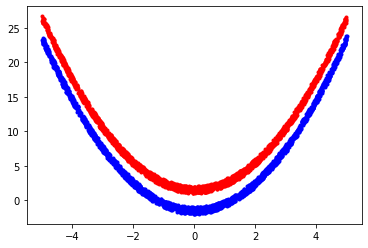

In [3]:
df1 = train_df[train_df.color==0]
df2 = train_df[train_df.color==1]

plt.scatter(df1.x, df1.y, marker = '.', color='red')
plt.scatter(df2.x, df2.y, marker = '.', color='blue')

plt.show()

# Sequencial API

In [4]:
# model = keras.Sequential([
# 	keras.layers.Dense(32, input_shape=(2,), activation='relu'),
# 	keras.layers.Dense(32, activation='relu'),
# 	keras.layers.Dense(2, activation='sigmoid')])

# Functional API

In [5]:
# Functional API (Func: It is more flexible as it can handle multiple input and multiple output - More Flexible)
inputs = keras.Input(shape=(2,))
x = keras.layers.Dense(32, activation='relu', name='First_layer')(inputs)
x = keras.layers.Dense(32, activation='relu', name='Second_layer')(x)
outputs = keras.layers.Dense(2, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())   # Network information -> Layers -> Nodes -> Parameters

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
First_layer (Dense)          (None, 32)                96        
_________________________________________________________________
Second_layer (Dense)         (None, 32)                1056      
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 1,218
Trainable params: 1,218
Non-trainable params: 0
_________________________________________________________________
None


# Modal Training

In [6]:
model.compile(optimizer='adam', 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

x = np.column_stack((train_df.x.values, train_df.y.values))

In [7]:
model.fit(x, train_df.color.values, batch_size=4, epochs=10, verbose=2)

Epoch 1/10
1000/1000 - 1s - loss: 0.5870 - accuracy: 0.7362
Epoch 2/10
1000/1000 - 1s - loss: 0.4549 - accuracy: 0.8765
Epoch 3/10
1000/1000 - 1s - loss: 0.3964 - accuracy: 0.9420
Epoch 4/10
1000/1000 - 1s - loss: 0.3672 - accuracy: 0.9653
Epoch 5/10
1000/1000 - 1s - loss: 0.3502 - accuracy: 0.9785
Epoch 6/10
1000/1000 - 1s - loss: 0.3418 - accuracy: 0.9837
Epoch 7/10
1000/1000 - 1s - loss: 0.3339 - accuracy: 0.9898
Epoch 8/10
1000/1000 - 1s - loss: 0.3318 - accuracy: 0.9890
Epoch 9/10
1000/1000 - 1s - loss: 0.3476 - accuracy: 0.9685
Epoch 10/10
1000/1000 - 1s - loss: 0.3296 - accuracy: 0.9870


# Test Data Evaluation

In [8]:
test_df = pd.read_csv('./data/test.csv')
test_x = np.column_stack((test_df.x.values, test_df.y.values))

print("EVALUATION")
model.evaluate(test_x, test_df.color.values)

EVALUATION
32/32 [==============================] - 0s 980us/step - loss: 0.3264 - accuracy: 0.9850


[0.32636919617652893, 0.9850000143051147]

# Test Data Plot

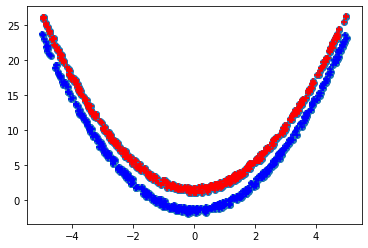

In [9]:
plt.scatter(test_df.x,test_df.y)

df1 = test_df[test_df.color==0]
df2 = test_df[test_df.color==1]

plt.scatter(df1.x, df1.y, marker = '+', color='red')
plt.scatter(df2.x, df2.y, marker = '+', color='blue')

plt.show()

In [11]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)

# fit the model
clf = svm.NuSVC(gamma="auto")
clf.fit(x, train_df.color.values)

from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn import svm

svm = SVC(C=0.5, kernel='linear')
svm.fit(x, y)


# Plot decision boundary
a = plot_decision_regions(x, y, clf=svm, legend=2)
handles, labels = a.get_legend_handles_labels()

plt.show()

NuSVC(gamma='auto')

# Plotting Hyperplane ( Training Data )

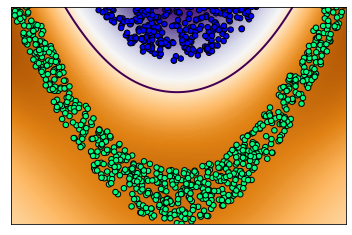

In [24]:
# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), 
           aspect="auto", origin="lower", cmap=plt.cm.PuOr_r,)

contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,)

plt.scatter(x[:, 0], x[:, 1], s=30, c=train_df.color.values, cmap='winter', edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-2, 2, -2, 2])
plt.show()

# Plotting Hyperplane ( Test Data )

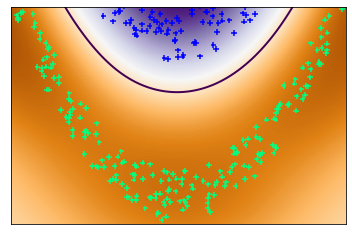

In [26]:
# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), 
           aspect="auto", origin="lower", cmap=plt.cm.PuOr_r,)

contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,)

plt.scatter(test_x[:, 0], test_x[:, 1], s=30, c=test_df.color.values, cmap='winter', marker='+', edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-2, 2, -2, 2])
plt.show()